In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:

dfx = pd.read_csv("./Logistic_X_Train.csv")
dfy = pd.read_csv("./Logistic_Y_Train.csv")

dfXT = pd.read_csv("./Logistic_X_Test.csv")

In [24]:
X_train = dfx.values
Y_train = dfy.values

X_test = dfXT.values

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(3000, 3)
(3000, 1)
(1000, 3)


In [25]:
plt.scatter?

In [26]:

def sigmoid(z):
    return 1/(1+np.exp(-z))


def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))

def error(Y,X,theta):
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        total_error += (Y[i]*np.log2(y_hat)+(1-Y[i])*np.log2(1-y_hat)) 
        
    return total_error/m #Average Loss

def get_grad(Y,X,theta):
    
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        grad += (Y[i] - y_hat)*x
        
        
    return grad/m #Average Gradient


def grad_descent(X,Y,learning_rate=0.05):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(1000):
        theta = theta + learning_rate*get_grad(Y,X,theta)
        e = error(Y,X,theta)
        error_list.append(e)
        
    return theta,error_list


In [27]:

theta,error_list = grad_descent(X_train,Y_train)

In [28]:
error_lis = np.array(error_list)

In [29]:
error_lis.shape

(1000, 1)

In [30]:
theta.shape

(3, 1)

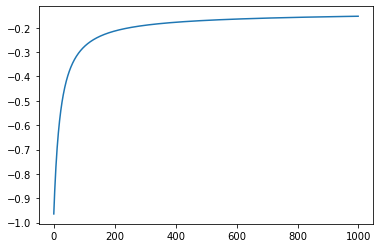

In [31]:

plt.plot(error_list)
plt.show()

In [32]:
def predict(Xtest,theta):
    prob = hypothesis(Xtest,theta)
    if prob<=0.5:
        return 0
    else:
        return 1

In [33]:
Y_Pred = np.array([predict(X_test[i],theta) for i in range(X_test.shape[0])])

In [34]:
outcome = pd.DataFrame({"label":Y_Pred})
outcome.to_csv("./submissionChemical2.csv", index= False)